# 07. Clusters - Creation and rasterization

### Creation

PyMica offers the possibility to apply different regional regression models. However, before applying them, the regions must be defined, and stations must be classified into these regions. This classification can be based on various factors such as administrative boundaries, climate regions, or automated methods, as is the case in this tutorial.

In this tutorial, we will use the K-Means algorithm to group stations. The implementation of K-Means is available through the [SciKit-Learn](https://scikit-learn.org/stable/) package.

First, let's load the required modules from the PyMica package, specifically `create_clusters`.

In [1]:
from pymica.utils.clusters import create_clusters

The `create_clusters` function takes five parameters:

1. Stations Data File Path: This parameter expects the path to a JSON file containing a list of stations that need to be grouped. Each station in the JSON file must have the following attributes: identification code (id), longitude (lon), and latitude (lat). For example:

   ```json
   {"id": "AN", 
    "lon": 2.18091,
    "lat": 41.39004}

   ```
2. Number of Clusters: The K-Means algorithm allows you to specify the desired number of clusters into which the stations will be grouped. This parameter determines how many distinct regions or clusters the data will be divided into.

3. ESRI Shapefile: Path to an ESRI Shapefile where the clusters will be saved.

4. Extent: Bounding box (x min, y min, x max, y max) that defines the area where clusters will be created.

5. EPSG: The EPSG code for the coordinate reference system.

Now, let's call the `create_clusters` function with the JSON file path and set the resultant number of clusters to 3. We'll use the bounding box as [260000, 4488100, 530000, 4750000] and the EPSG code as 25831, which corresponds to UTM 31N.

In [2]:
%%capture
# We are capturing some warnings to prevent them from appearing during the execution of this cell
create_clusters('sample-data/data/smc_data.json', 6, 'sample-data/clusters/clusters_6.shp', [260000, 4488100, 530000, 4750000], 25831)

After creating the clusters, we can check the output in any GIS to determine in which cluster each station has been classified and to make modifications if necessary.


### Rasterization

Once the clusters are defined, whether automatically or following other criteria, they need to be rasterized to be used by PyMICA for `mlr` (Multiple Linear Regression) interpolation methodologies, including those with residual correction.

In this section, we will rasterize cluster polygons obtained from the previous ESRI Shapefile and apply a blurring effect. The resulting raster matrices will assign a value of 1 inside the polygon area and 0 outside of it. To avoid a sharp transition when merging clusters, a blurring effect is performed.

To accomplish this task, we will use the `pymica.utils.clusters.rasterize_clusters()` function. It requires an ESRI Shapefile path and a dictionary with output properties as parameters.

1. Clusters JSON file path or an ogr datasource object:

   This parameter expects either a file path pointing to the clusters' boundaries in the same format as obtained in the previous section, or it can receive an ogr datasource object. Users can choose to use automatically generated clusters or create their own.

2. Output properties:

   - `out_file`: The desired output file path and name.
   - `size`: The output raster size.
   - `geotransform`: The output raster geotransform.

For the first parameter, we will pass the ESRI Shapefile obtained earlier.

In this case, we will set `out_file` as `'sample-data/clusters/rasterized_clusters_3'`. The remaining two parameters will be set to align with the extent and resolution of the final interpolated field we want to obtain, matching the characteristics of the Digital Elevation Model used in other tutorials.


In [3]:
out_properties = {'out_file'    : 'sample-data/clusters/rasterized_clusters_6',
                  'size'        : [1000, 970],
                  'geotransform': [260000, 270, 0, 4750000, 0, -270]}

Now, let's call the `pymica.utils.clusters.rasterize_clusters()`.

In [4]:
from pymica.utils.clusters import rasterize_clusters

rasterize_clusters('sample-data/clusters/clusters_6.shp', out_properties, sigma=30)

The clusters have been rasterized and saved as a GeoTIFF file.

Now, we can get a quick look of the `data_field` array using `matplotlib`.

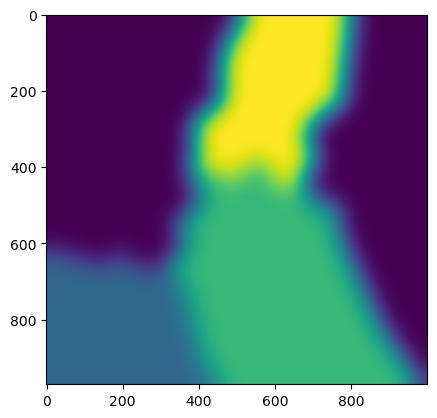

In [5]:
import matplotlib.pyplot as plt
from osgeo import gdal

clusters_fields = gdal.Open('sample-data/clusters/rasterized_clusters_6')
clusters_fields = clusters_fields.ReadAsArray()

plt.imshow(clusters_fields[0] * 1 + clusters_fields[1] * 2 + clusters_fields[2] * 3)

We have now completed this tutorial on how to create station clusters, which can be applied in mlr methodologies. Feel free to experiment by changing the number of clusters.